<a href="https://colab.research.google.com/github/keulreobeu/bigdate_student/blob/main/%EC%83%88%EC%8B%B9_%ED%97%AC%EC%8A%A4%EC%BC%80%EC%96%B4_%EC%84%9C%EB%B9%84%EC%8A%A4%EA%B8%B0%ED%9A%8D/%EA%B5%B0%EC%A7%91%ED%99%94%EB%AA%A8%EB%8D%B8_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집화 모델
`작성자: 최원칠 강사`   
`traveler4d@gmail.com`

--활용데이터--

[Healthcare Diabetes](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?select=Healthcare-Diabetes.csv)

[건강검진정보](https://www.data.go.kr/data/15007122/fileData.do)


군집화 모델은 매개변수의 특성을 학습하여 자동으로 군집을 나누는 모델입니다.   
대부분의 군집화 모델은 라벨이 없는 데이터세트를 학습하는 비지도학습 방식을 따릅니다.   
분류모델과 비슷하지만, 라벨링이 되어있지 않는 상황에서 활용할 수 있다는 장점이 있습니다.


**군집화 모델 종류**
- Kmeans
- Spectral clustering
- DBSCAN

In [27]:
# 한글폰트 입력 (세션 재실행)
!sudo apt-get install -y fonts-nanum

import shutil
import matplotlib as mpl

font_cache_dir = mpl.get_cachedir()
shutil.rmtree(font_cache_dir)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/matplotlib'

In [2]:
import zipfile
import os

zip_filename = '머신러닝.zip'
extract_folder = '/content'

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zipf:
    zipf.extractall(extract_folder)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/content/NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

## kmeans 클러스터링

kmeans 클러스터링은 가장 대표적으로 사용되는 군집화 모델입니다.  
원하는 군집의 개수를 지정해주면 해당 군집의 중심점($\mu$)에서 데이터(x)의 거리를 제곱한 값을 최소가 되게 중심점을 업데이트 해갑니다.   
$$ (x - \mu)^2 $$


In [ ]:
import pandas as pd

df = pd.read_csv('Healthcare-Diabetes.csv')
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


#### 데이터의 분포 확인

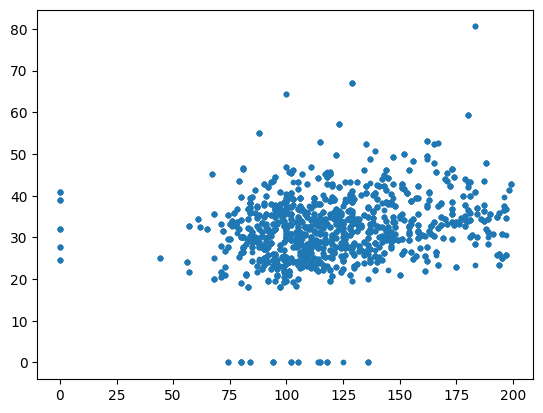

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df['Glucose'], y=df['BMI'], s=10)
plt.show()

#### kmeans 모델 학습
sklearn의 KMeans 모델을 활용하여 군집화를 진행합니다.   
이때 기본적으로 `n_clusters` 인자에 군집 개수를 입력해 주어야 합니다.   
[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clust_df = df[['Glucose', 'BMI']]
data = clust_df.to_numpy()
scaler = StandardScaler()
data = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=4,    # 군집 개수
                max_iter = 100   # 반복 횟수
               )
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=4)

#### 군집화 결과 확인

In [ ]:
clust_df['군집'] = kmeans.predict(data)
clust_df

C:\Users\trave\AppData\Local\Temp\ipykernel_48308\1849915974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df['군집'] = kmeans.predict(data)


,Glucose,BMI,군집
0,148,33.6,0
1,85,26.6,3
2,183,23.3,0
3,89,28.1,3
4,137,43.1,1
...,...,...,...
2763,75,29.7,3
2764,179,32.7,0
2765,85,31.2,2
2766,129,67.1,1


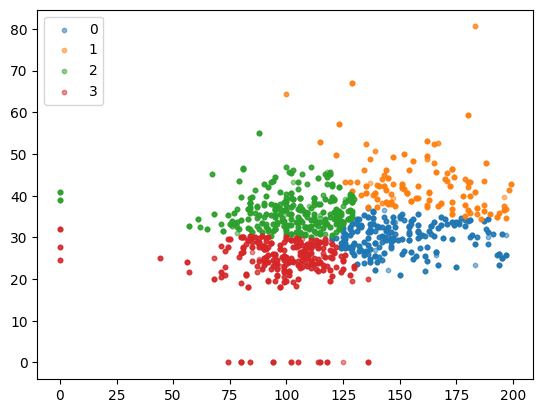

In [ ]:
for i in range(4):
    c_df = clust_df[clust_df['군집'] == i]
    plt.scatter(x=c_df['Glucose'], y=c_df['BMI'], s=10, alpha=0.5, label = i)

plt.legend()
plt.show()


#### 여러개의 매개변수를 사용하여 군집화 및 차원축소 시각화

여러개의 매개변수(컬럼)을 사용하여 군집화를 진행하는 경우 2차원으로만 표현되는 표에 시각화가 불가능 합니다.   
이때 차원축소 알고리즘을 활용하여 여러차원의 매개변수를 2차원으로 축소하여 그래표에 표현 가능합니다.   

In [ ]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
usecol = ['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction']

data = df[usecol].to_numpy()
scaler = StandardScaler()
data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data)
df['군집'] = kmeans.predict(data)
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,군집
0,1,6,148,72,35,0,33.6,0.627,50,1,2
1,2,1,85,66,29,0,26.6,0.351,31,0,2
2,3,8,183,64,0,0,23.3,0.672,32,1,0
3,4,1,89,66,23,94,28.1,0.167,21,0,2
4,5,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0,2
2764,2765,8,179,72,42,130,32.7,0.719,36,1,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1,1


#### PCA 차원 축소
PCA(주성분 분석)는 데이터를 투사했을때 분산이 큰 순으로 좌표계를 설정하는 방식으로 차원을 축소시키는 대표적인 방식입니다.   
[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 표현할 차원수 설정
pca_data = pca.fit_transform(data)
pca_data

array([[ 0.65434058,  0.04680752],
       [-0.95888057,  0.39700522],
       [-0.7433375 , -1.12612237],
       ...,
       [-1.36812992,  0.8627404 ],
       [ 3.65166371,  3.01560447],
       [-0.63942407,  0.18914022]])

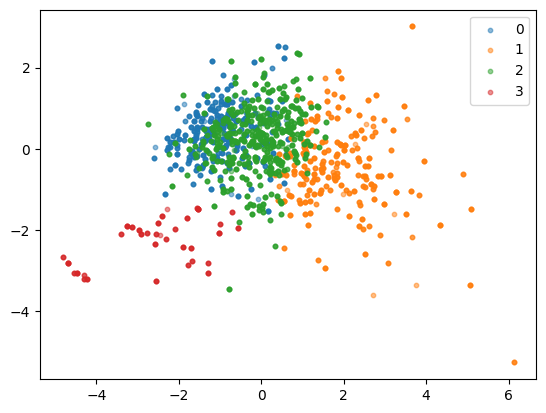

In [ ]:
df[['pca1','pca2']] = pca_data
for i in range(4):
    c_df = df[df['군집'] == i]
    plt.scatter(x=c_df['pca1'], y=c_df['pca2'], s=10, alpha=0.5, label = i)

plt.legend()
plt.show()


# 실습하기

#### [군집화]
국민건강보험공단_건강검진정보(ML).csv 파일을 로드하고 군집화 분석 진행
- `'허리둘레', '식전혈당(공복혈당)', '총콜레스테롤', '혈색소', '수축기혈압'` 컬럼을 활용
- 결측치 처리, 이상치 제거, 스케일링 등 필요에 따른 데이터 전처리 진행
- kmeans 알고리즘을 활용하여 4개의 클러스터로 군집화
- PCA 주성분 차원축소를 통해 2차원으로 성분을 줄여 산점도 시각화 (군집에 따라 다른색)
- 각 변수들을 2개씩 선정해 군집에 따라 색상이 다르게 산점도 시각화 하여 각 군집에 영향을 미치는 요소를 탐색

In [75]:
import pandas as pd
df = pd.read_csv('/content/국민건강보험공단_건강검진정보(ML).csv')

In [68]:
df.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,...,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,수축기혈압,혈압구분
0,2022,3281012,41,1,11,170,65,79.0,107.0,188.0,...,15.6,1.0,0.9,35.0,35.0,60.0,2.0,1.0,126.0,정상
1,2022,4004217,44,2,13,145,50,80.0,87.0,217.0,...,14.0,1.0,0.6,40.0,36.0,22.0,1.0,0.0,132.0,정상
2,2022,1303180,30,2,12,150,50,74.0,92.0,214.0,...,13.6,1.0,0.5,22.0,17.0,31.0,1.0,1.0,126.0,정상
3,2022,3748827,41,2,10,160,80,97.0,100.0,243.0,...,13.5,1.0,0.8,29.0,45.0,20.0,1.0,1.0,120.0,고혈압
4,2022,279572,26,2,18,145,40,73.0,96.0,129.0,...,10.4,1.0,1.0,29.0,14.0,30.0,1.0,0.0,138.0,정상


In [76]:
len(df['가입자일련번호'].unique())

50000

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         50000 non-null  int64  
 1   가입자일련번호      50000 non-null  int64  
 2   시도코드         50000 non-null  int64  
 3   성별           50000 non-null  int64  
 4   연령대코드(5세단위)  50000 non-null  int64  
 5   신장(5cm단위)    50000 non-null  int64  
 6   체중(5kg단위)    50000 non-null  int64  
 7   허리둘레         49998 non-null  float64
 8   식전혈당(공복혈당)   50000 non-null  float64
 9   총콜레스테롤       50000 non-null  float64
 10  트리글리세라이드     49999 non-null  float64
 11  HDL콜레스테롤     49999 non-null  float64
 12  LDL콜레스테롤     49027 non-null  float64
 13  혈색소          50000 non-null  float64
 14  요단백          49718 non-null  float64
 15  혈청크레아티닌      50000 non-null  float64
 16  혈청지오티(AST)   50000 non-null  float64
 17  혈청지피티(ALT)   50000 non-null  float64
 18  감마지티피        50000 non-null  float64
 19  흡연상태

In [77]:
df.drop(['기준년도','가입자일련번호','시도코드'],axis=1, inplace=True)

In [78]:
df['혈압구분'].unique()

array(['정상', '고혈압', '저혈압'], dtype=object)

In [79]:
df['혈압구분'].replace({'저혈압':0, '정상':1, '고혈압': 2}, inplace=True)

/tmp/ipython-input-1598966349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['혈압구분'].replace({'저혈압':0, '정상':1, '고혈압': 2}, inplace=True)
/tmp/ipython-input-1598966349.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['혈압구분'].replace({'저혈압':0, '정상':1, '고혈압': 2}, inplace=True)


In [80]:
seq_list = ['연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)'
, '허리둘레', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드'
, 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '혈청크레아티닌'
, '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '수축기혈압']

cate_list = ['성별','요단백','흡연상태','음주여부','혈압구분']

df[seq_list].corr()

,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,수축기혈압
연령대코드(5세단위),1.000000,-0.494685,-0.358682,-0.002944,0.158387,-0.163578,-0.058988,-0.029072,-0.155953,-0.295770,-0.016669,0.030871,-0.099871,-0.042704,0.214170
신장(5cm단위),-0.494685,1.000000,0.671145,0.340137,0.008888,0.020630,0.134913,-0.189016,0.038104,0.511096,0.229818,0.024986,0.145936,0.111664,-0.020914
체중(5kg단위),-0.358682,0.671145,1.000000,0.800275,0.119373,0.028880,0.255935,-0.342357,0.044144,0.476781,0.193209,0.099265,0.286270,0.149053,0.183672
허리둘레,-0.002944,0.340137,0.800275,1.000000,0.199985,-0.026720,0.262534,-0.378275,-0.014392,0.345503,0.162468,0.123221,0.271691,0.153653,0.279776
식전혈당(공복혈당),0.158387,0.008888,0.119373,0.199985,1.000000,-0.056444,0.181231,-0.130024,-0.102209,0.076262,0.047875,0.068800,0.101985,0.102997,0.149265
총콜레스테롤,-0.163578,0.020630,0.028880,-0.026720,-0.056444,1.000000,0.257397,0.212123,0.927824,0.130308,-0.061746,0.007486,0.044491,0.059659,0.002360
트리글리세라이드,-0.058988,0.134913,0.255935,0.262534,0.181231,0.257397,1.000000,-0.325268,0.035180,0.208544,0.063119,0.098563,0.168490,0.204330,0.131329
HDL콜레스테롤,-0.029072,-0.189016,-0.342357,-0.378275,-0.130024,0.212123,-0.325268,1.000000,0.024826,-0.190512,-0.137322,-0.029447,-0.139649,-0.038983,-0.095293
LDL콜레스테롤,-0.155953,0.038104,0.044144,-0.014392,-0.102209,0.927824,0.035180,0.024826,1.000000,0.124691,-0.046224,-0.018187,0.024967,-0.004265,-0.027162
혈색소,-0.295770,0.511096,0.476781,0.345503,0.076262,0.130308,0.208544,-0.190512,0.124691,1.000000,0.137464,0.109833,0.239645,0.149087,0.093753


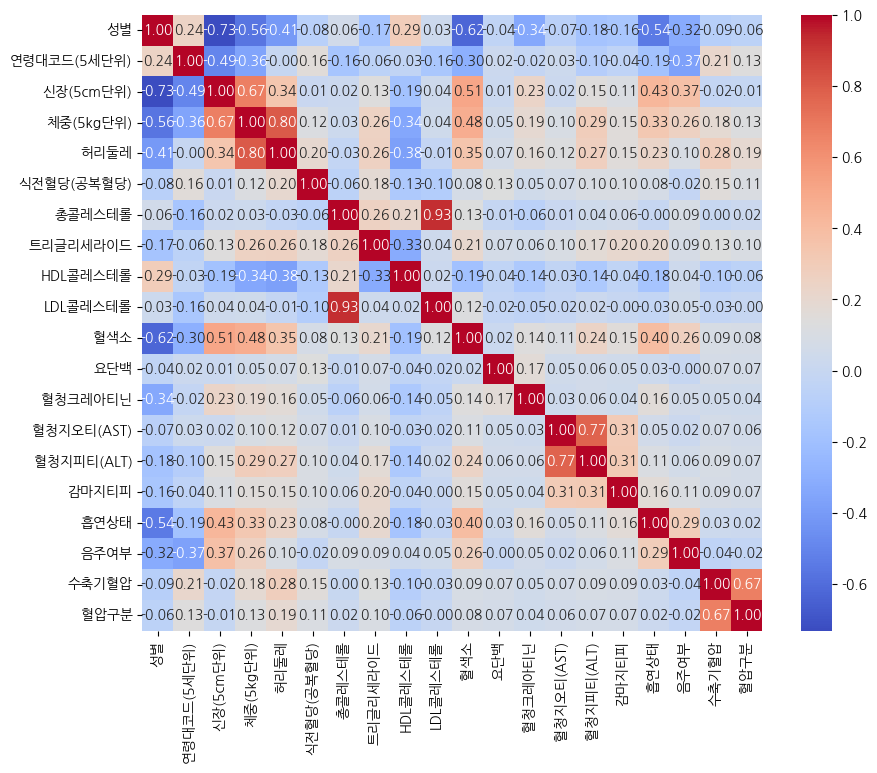

In [81]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm', fmt=".2f", annot=True)
plt.show()

*   허리둘레 <-> 채중, 콜레스테롤 <-> LDL, AST <-> ALT
*   강한 상관계수, nan값을 유추 가능
*   허리둘레 2건, LDL다수, 혈청은 없음
*   nan값이 많은 요단백은 강한 상관계수를 가지고 있는 요소가 없음

In [82]:
df[seq_list].describe()

,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,수축기혈압
count,50000.000000,50000.000000,50000.000000,49998.000000,50000.000000,50000.000000,49999.000000,49999.000000,49027.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.289180,162.465300,64.727500,82.485765,102.678340,197.777740,132.379348,56.831223,115.243764,14.284022,0.856168,28.075120,27.826420,38.072920,124.799580
std,2.831974,9.654619,13.656609,10.105496,25.074013,43.121908,109.836125,15.237667,38.114465,1.575167,0.357029,20.928853,26.374799,70.205497,14.715637
min,5.000000,130.000000,30.000000,50.500000,27.000000,48.000000,6.000000,5.000000,2.000000,3.600000,0.060000,2.000000,2.000000,1.000000,76.000000
25%,9.000000,155.000000,55.000000,75.500000,90.000000,169.000000,75.000000,46.000000,89.000000,13.200000,0.700000,20.000000,16.000000,16.000000,115.000000
50%,11.000000,165.000000,65.000000,82.000000,98.000000,196.000000,107.000000,55.000000,114.000000,14.300000,0.800000,24.000000,22.000000,24.000000,124.000000
75%,13.000000,170.000000,75.000000,89.000000,107.000000,225.000000,158.000000,65.000000,139.000000,15.400000,1.000000,31.000000,32.000000,40.000000,134.000000
max,18.000000,195.000000,135.000000,135.000000,648.000000,1683.000000,7766.000000,661.000000,1163.000000,20.600000,17.800000,1588.000000,2201.000000,9999.000000,255.000000


array([[<Axes: title={'center': '성별'}>,
        <Axes: title={'center': '연령대코드(5세단위)'}>,
        <Axes: title={'center': '신장(5cm단위)'}>,
        <Axes: title={'center': '체중(5kg단위)'}>],
       [<Axes: title={'center': '허리둘레'}>,
        <Axes: title={'center': '식전혈당(공복혈당)'}>,
        <Axes: title={'center': '총콜레스테롤'}>,
        <Axes: title={'center': '트리글리세라이드'}>],
       [<Axes: title={'center': 'HDL콜레스테롤'}>,
        <Axes: title={'center': 'LDL콜레스테롤'}>,
        <Axes: title={'center': '혈색소'}>, <Axes: title={'center': '요단백'}>],
       [<Axes: title={'center': '혈청크레아티닌'}>,
        <Axes: title={'center': '혈청지오티(AST)'}>,
        <Axes: title={'center': '혈청지피티(ALT)'}>,
        <Axes: title={'center': '감마지티피'}>],
       [<Axes: title={'center': '흡연상태'}>,
        <Axes: title={'center': '음주여부'}>,
        <Axes: title={'center': '수축기혈압'}>,
        <Axes: title={'center': '혈압구분'}>]], dtype=object)

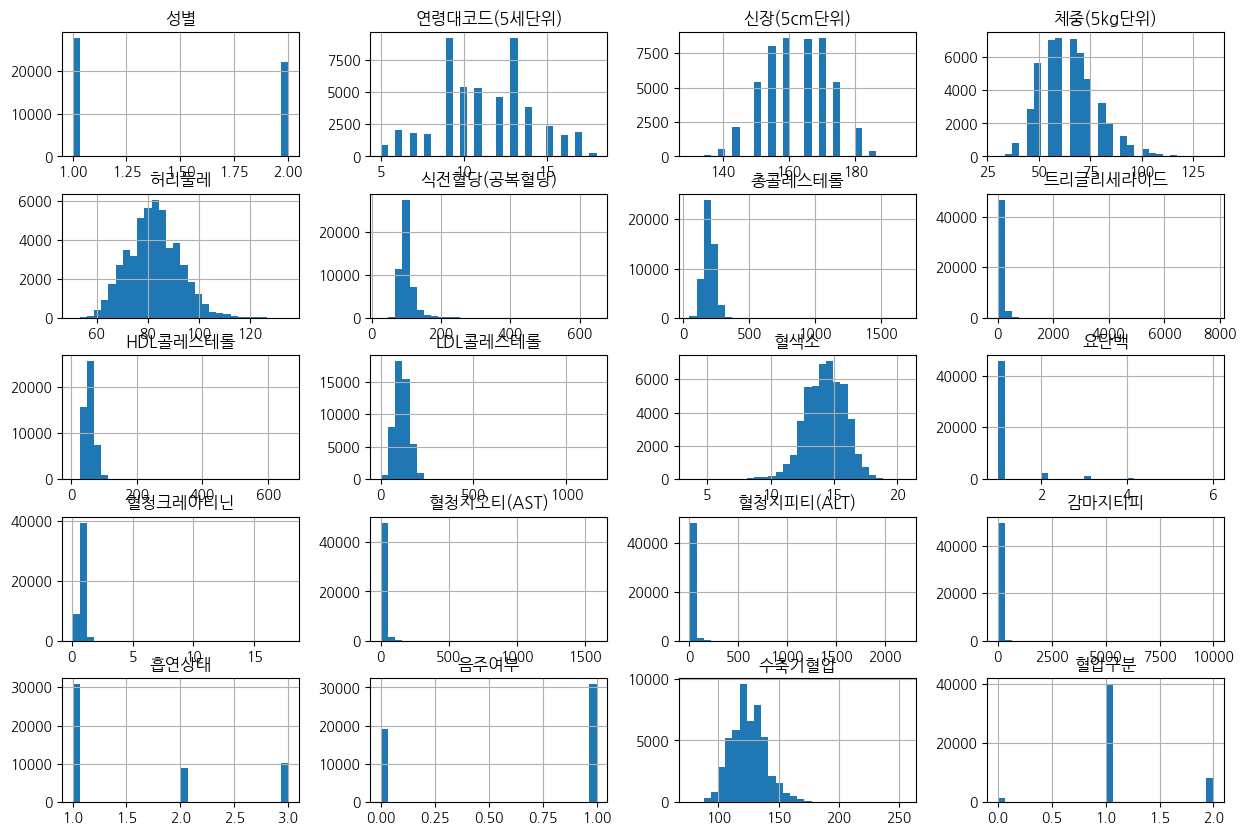

In [83]:
df.hist(bins=30, figsize=(15,10))

식전혈당, 콜레스테롤, 트리글리세롤, HDL, LDL, 혈청지오티, 혈청지피티, 감마지티피 -> 이상치 있음

In [84]:
out_list = ['식전혈당(공복혈당)', '총콜레스테롤' ,'트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤','혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피' ]

In [85]:
df[out_list].describe()

,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈청지오티(AST),혈청지피티(ALT),감마지티피
count,50000.000000,50000.000000,49999.000000,49999.000000,49027.000000,50000.000000,50000.000000,50000.000000
mean,102.678340,197.777740,132.379348,56.831223,115.243764,28.075120,27.826420,38.072920
std,25.074013,43.121908,109.836125,15.237667,38.114465,20.928853,26.374799,70.205497
min,27.000000,48.000000,6.000000,5.000000,2.000000,2.000000,2.000000,1.000000
25%,90.000000,169.000000,75.000000,46.000000,89.000000,20.000000,16.000000,16.000000
50%,98.000000,196.000000,107.000000,55.000000,114.000000,24.000000,22.000000,24.000000
75%,107.000000,225.000000,158.000000,65.000000,139.000000,31.000000,32.000000,40.000000
max,648.000000,1683.000000,7766.000000,661.000000,1163.000000,1588.000000,2201.000000,9999.000000


In [86]:
Q1 = df[out_list].quantile(0.25)
Q3 = df[out_list].quantile(0.75)
IQR = Q3 - Q1

# 일반적인 기준: 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[out_list] < lower_bound) | (df[out_list] > upper_bound)]
normal   = df[(df[out_list] >= lower_bound) & (df[out_list] <= upper_bound)]

In [87]:
outliers[out_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   식전혈당(공복혈당)  3580 non-null   float64
 1   총콜레스테롤      442 non-null    float64
 2   트리글리세라이드    2766 non-null   float64
 3   HDL콜레스테롤    944 non-null    float64
 4   LDL콜레스테롤    438 non-null    float64
 5   혈청지오티(AST)  3042 non-null   float64
 6   혈청지피티(ALT)  3380 non-null   float64
 7   감마지티피       4402 non-null   float64
dtypes: float64(8)
memory usage: 3.1 MB


array([[<Axes: title={'center': '식전혈당(공복혈당)'}>,
        <Axes: title={'center': '총콜레스테롤'}>,
        <Axes: title={'center': '트리글리세라이드'}>],
       [<Axes: title={'center': 'HDL콜레스테롤'}>,
        <Axes: title={'center': 'LDL콜레스테롤'}>,
        <Axes: title={'center': '혈청지오티(AST)'}>],
       [<Axes: title={'center': '혈청지피티(ALT)'}>,
        <Axes: title={'center': '감마지티피'}>, <Axes: >]], dtype=object)

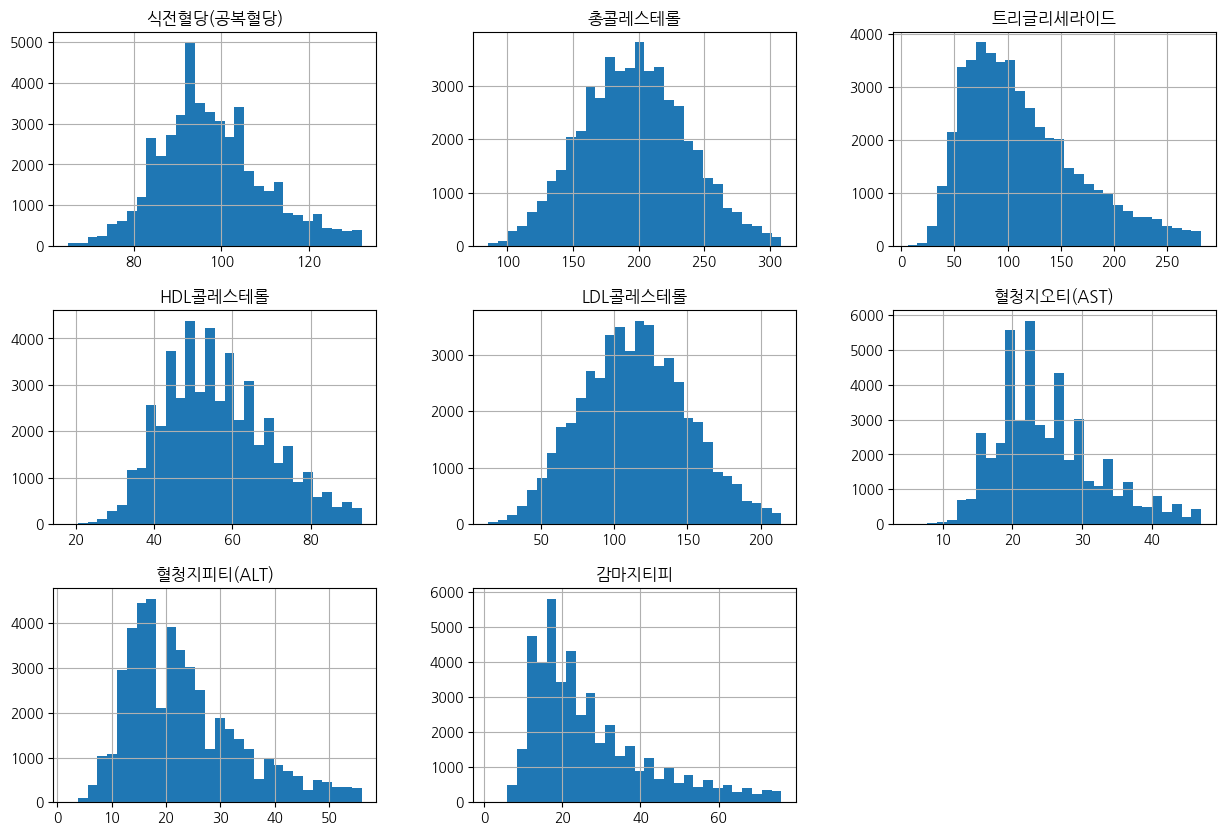

In [88]:
normal[out_list].hist(bins=30, figsize=(15,10))

스텐다드 스케일링

In [100]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           0 non-null      float64
 1   연령대코드(5세단위)  0 non-null      float64
 2   신장(5cm단위)    0 non-null      float64
 3   체중(5kg단위)    0 non-null      float64
 4   허리둘레         0 non-null      float64
 5   식전혈당(공복혈당)   46420 non-null  float64
 6   총콜레스테롤       49558 non-null  float64
 7   트리글리세라이드     47233 non-null  float64
 8   HDL콜레스테롤     49055 non-null  float64
 9   LDL콜레스테롤     48589 non-null  float64
 10  혈색소          0 non-null      float64
 11  요단백          0 non-null      float64
 12  혈청크레아티닌      0 non-null      float64
 13  혈청지오티(AST)   46958 non-null  float64
 14  혈청지피티(ALT)   46620 non-null  float64
 15  감마지티피        45598 non-null  float64
 16  흡연상태         0 non-null      float64
 17  음주여부         0 non-null      float64
 18  수축기혈압        0 non-null      float64
 19  혈압구분

In [90]:
nom_df = normal[out_list].dropna()

In [91]:
nom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37477 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   식전혈당(공복혈당)  37477 non-null  float64
 1   총콜레스테롤      37477 non-null  float64
 2   트리글리세라이드    37477 non-null  float64
 3   HDL콜레스테롤    37477 non-null  float64
 4   LDL콜레스테롤    37477 non-null  float64
 5   혈청지오티(AST)  37477 non-null  float64
 6   혈청지피티(ALT)  37477 non-null  float64
 7   감마지티피       37477 non-null  float64
dtypes: float64(8)
memory usage: 2.6 MB


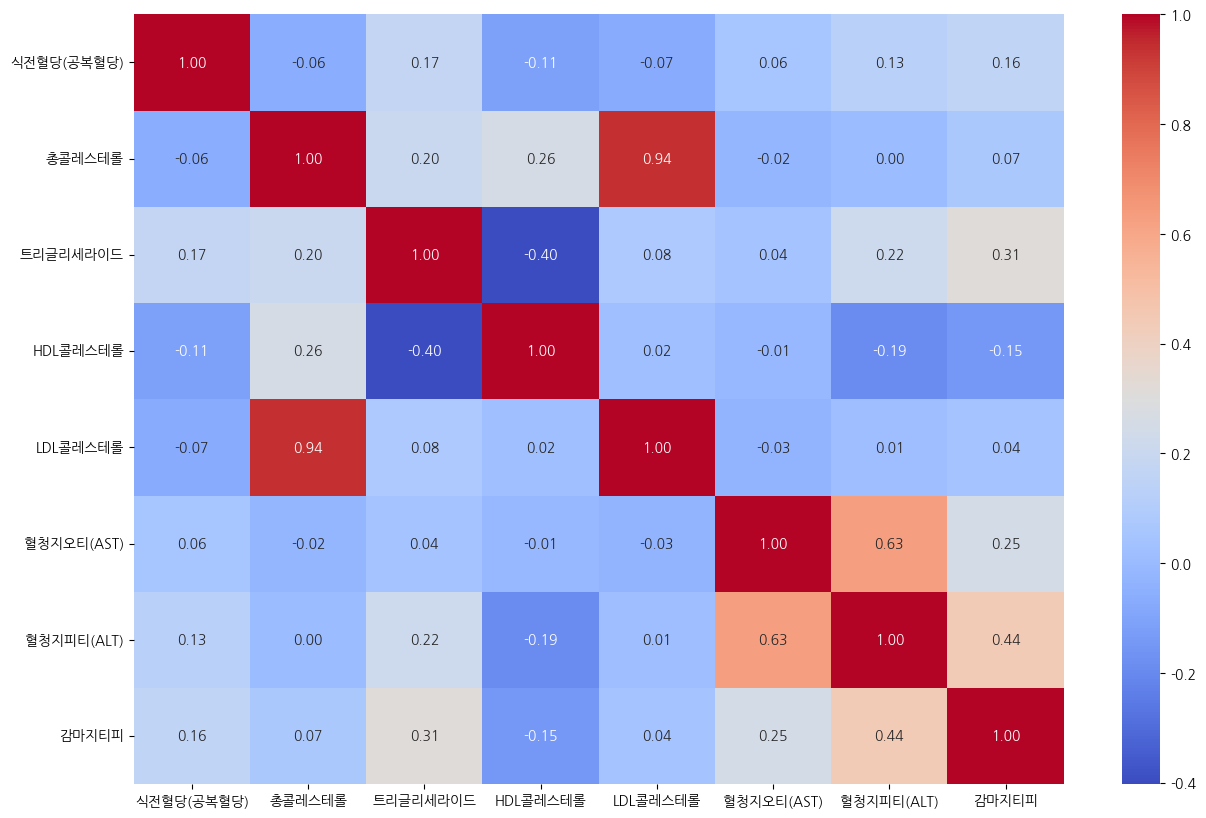

In [92]:
plt.figure(figsize=(15,10))
sns.heatmap(nom_df.corr(),cmap='coolwarm', fmt=".2f", annot=True)
plt.show()

In [102]:
out_df = df.iloc[nom_df.index]

In [103]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37477 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           37477 non-null  int64  
 1   연령대코드(5세단위)  37477 non-null  int64  
 2   신장(5cm단위)    37477 non-null  int64  
 3   체중(5kg단위)    37477 non-null  int64  
 4   허리둘레         37476 non-null  float64
 5   식전혈당(공복혈당)   37477 non-null  float64
 6   총콜레스테롤       37477 non-null  float64
 7   트리글리세라이드     37477 non-null  float64
 8   HDL콜레스테롤     37477 non-null  float64
 9   LDL콜레스테롤     37477 non-null  float64
 10  혈색소          37477 non-null  float64
 11  요단백          37273 non-null  float64
 12  혈청크레아티닌      37477 non-null  float64
 13  혈청지오티(AST)   37477 non-null  float64
 14  혈청지피티(ALT)   37477 non-null  float64
 15  감마지티피        37477 non-null  float64
 16  흡연상태         37471 non-null  float64
 17  음주여부         37470 non-null  float64
 18  수축기혈압        37477 non-null  float64
 19  혈압구분     

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

out_df[seq_list] = scaler.fit_transform(out_df[seq_list])

/tmp/ipython-input-1572785535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[seq_list] = scaler.fit_transform(out_df[seq_list])


In [111]:
out_df.dropna(inplace=True)

/tmp/ipython-input-1342389014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df.dropna(inplace=True)


In [114]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37260 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별           37260 non-null  int64  
 1   연령대코드(5세단위)  37260 non-null  float64
 2   신장(5cm단위)    37260 non-null  float64
 3   체중(5kg단위)    37260 non-null  float64
 4   허리둘레         37260 non-null  float64
 5   식전혈당(공복혈당)   37260 non-null  float64
 6   총콜레스테롤       37260 non-null  float64
 7   트리글리세라이드     37260 non-null  float64
 8   HDL콜레스테롤     37260 non-null  float64
 9   LDL콜레스테롤     37260 non-null  float64
 10  혈색소          37260 non-null  float64
 11  요단백          37260 non-null  float64
 12  혈청크레아티닌      37260 non-null  float64
 13  혈청지오티(AST)   37260 non-null  float64
 14  혈청지피티(ALT)   37260 non-null  float64
 15  감마지티피        37260 non-null  float64
 16  흡연상태         37260 non-null  float64
 17  음주여부         37260 non-null  float64
 18  수축기혈압        37260 non-null  float64
 19  혈압구분     

In [121]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clust_df = out_df[['허리둘레', '식전혈당(공복혈당)', '총콜레스테롤', '혈색소', '수축기혈압']]
data = clust_df.to_numpy()
scaler = StandardScaler()
data = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=4,    # 군집 개수
                max_iter = 100   # 반복 횟수
               )
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=4)

In [122]:
clust_df['군집'] = kmeans.predict(data)
clust_df

/tmp/ipython-input-1849915974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df['군집'] = kmeans.predict(data)


,허리둘레,식전혈당(공복혈당),총콜레스테롤,혈색소,수축기혈압,군집
0,-0.223528,0.839439,-0.186140,0.967618,0.158161,1
1,-0.118915,-0.863319,0.568130,-0.073989,0.571836,3
2,-0.746595,-0.437630,0.490102,-0.334391,0.158161,0
3,1.659513,0.243473,1.244373,-0.399491,-0.255514,3
4,-0.851209,-0.097078,-1.720689,-2.417605,0.985512,0
...,...,...,...,...,...,...
49994,-0.746595,0.073198,-0.966419,0.772317,-0.876026,1
49995,-0.746595,0.498887,0.854233,-0.399491,-0.600243,0
49996,1.136446,2.797610,-1.434587,-1.245797,1.054457,2
49998,0.822606,1.946231,0.282028,1.032719,0.640782,2


In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 표현할 차원수 설정
pca_data = pca.fit_transform(data)
pca_data

array([[ 0.71833294,  0.0574299 ],
       [-0.22034208,  0.54105056],
       [-0.74451383,  0.23267239],
       ...,
       [ 1.93586066, -2.86654395],
       [ 2.08925389,  0.00858309],
       [ 1.16126061, -2.20641763]])

/tmp/ipython-input-3785017264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df[['pca1','pca2']] = pca_data
/tmp/ipython-input-3785017264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df[['pca1','pca2']] = pca_data


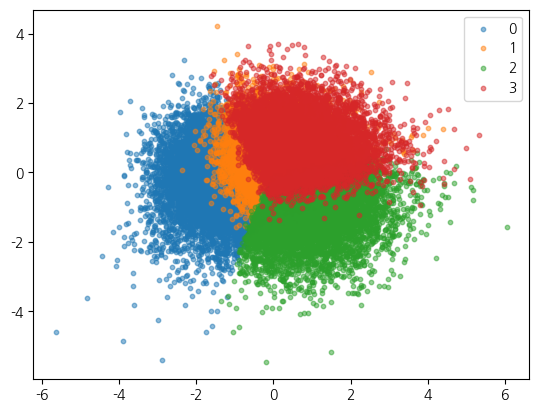

In [124]:
clust_df[['pca1','pca2']] = pca_data
for i in range(4):
    c_df = clust_df[clust_df['군집'] == i]
    plt.scatter(x=c_df['pca1'], y=c_df['pca2'], s=10, alpha=0.5, label = i)

plt.legend()
plt.show()

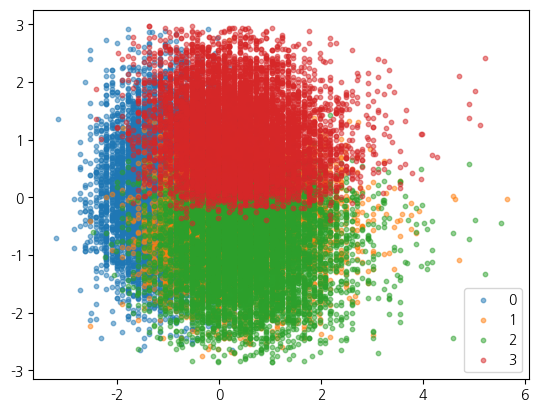

In [125]:
for i in range(4):
    c_df = clust_df[clust_df['군집'] == i]
    plt.scatter(x=c_df['허리둘레'], y=c_df['총콜레스테롤'], s=10, alpha=0.5, label = i)

plt.legend()
plt.show()